In [277]:
# Import the libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import itertools
import statsmodels.api as sm
import matplotlib
from textwrap import wrap
from matplotlib import ticker
from datetime import datetime


warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
%matplotlib inline


## Importing the data



In [278]:
#print(os.listdir('../data'))
df = pd.read_csv('../data/NumberConfirmedOfCases.csv')
#df = df.set_index('Date', append=False)
#df['Date'] = df.apply(lambda x: datetime.strptime(x['Date'], '%d-%m-%Y').date(), axis=1) #convert the date
df = df.groupby('Date')['Cases'].sum().reset_index() #group the data
df['Date'] = pd.to_datetime(df['Date'])    
df['date_delta'] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')
df.head()

,Date,Cases,date_delta
0,2020-03-12,1,0.0
1,2020-03-20,1,8.0
2,2020-03-24,1,12.0
3,2020-03-25,1,13.0
4,2020-03-27,2,15.0


In [279]:
#print(os.listdir('../data'))
df = pd.read_csv('../data/NumberConfirmedOfCases.csv')
#df = df.set_index('Date', append=False)
#df['Date'] = df.apply(lambda x: datetime.strptime(x['Date'], '%d-%m-%Y').date(), axis=1) #convert the date
df = df.groupby('Date')['Cases'].sum().reset_index() #group the data
df.head()

,Date,Cases
0,2020-03-12,1
1,2020-03-20,1
2,2020-03-24,1
3,2020-03-25,1
4,2020-03-27,2


## Visualizing the time series data

We are going to use matplotlib to visualise the dataset.

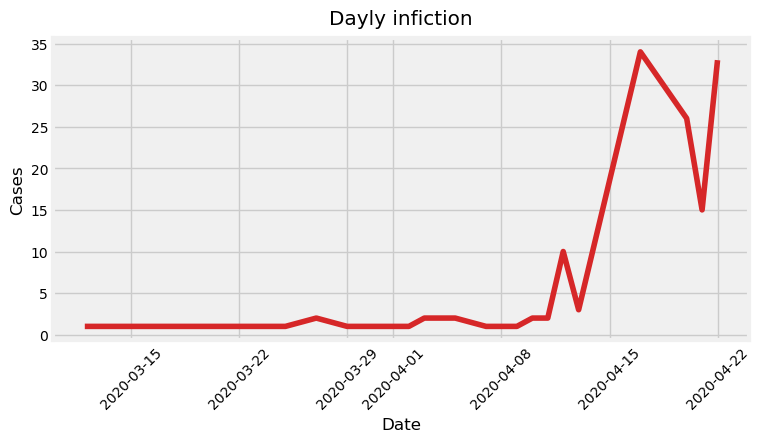

In [280]:
# Time series data source: fpp pacakge in R.
import matplotlib.pyplot as plt
df = pd.read_csv('../data/NumberConfirmedOfCases.csv', parse_dates=['Date'], index_col='Date')
df = df.groupby('Date')['Cases'].sum().reset_index() #group the data

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Cases', dpi=100,angle=45):
    plt.figure(figsize=(8,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=angle)
    plt.show()

plot_df(df, x=df.Date, y=df.Cases, title='Dayly infiction')    

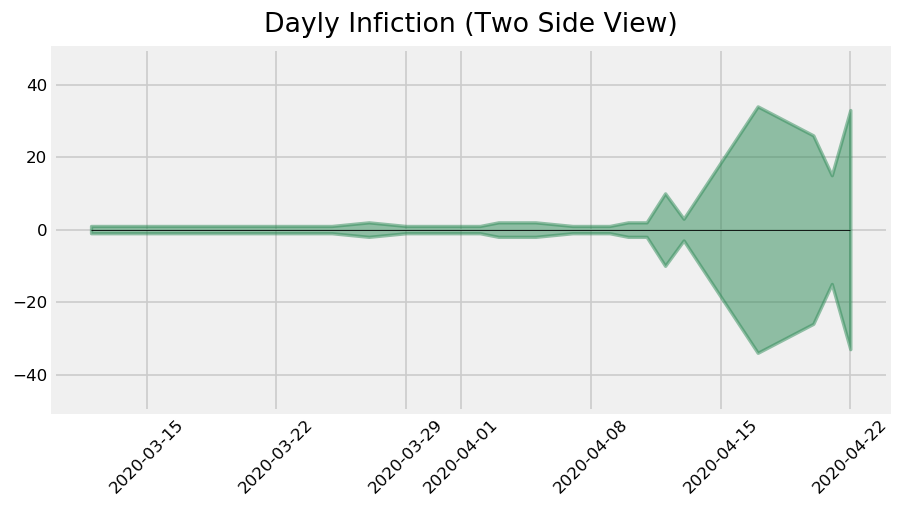

In [281]:

x = df['Date'].values
y1 = df['Cases'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(8,4), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-50, 50)
plt.title('Dayly Infiction (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.Date), xmax=np.max(df.Date), linewidth=.5)
plt.xticks(rotation=45)
plt.show()

## Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution

You can group the data at seasonal intervals and see how the values are distributed within a given year or month and how it compares over time.

The boxplots make the year-wise and month-wise distributions evident. Also, in a month-wise boxplot, the months of December and January clearly has higher drug sales, which can be attributed to the holiday discounts season.

So far, we have seen the similarities to identify the pattern. Now, how to find out any deviations from the usual pattern?

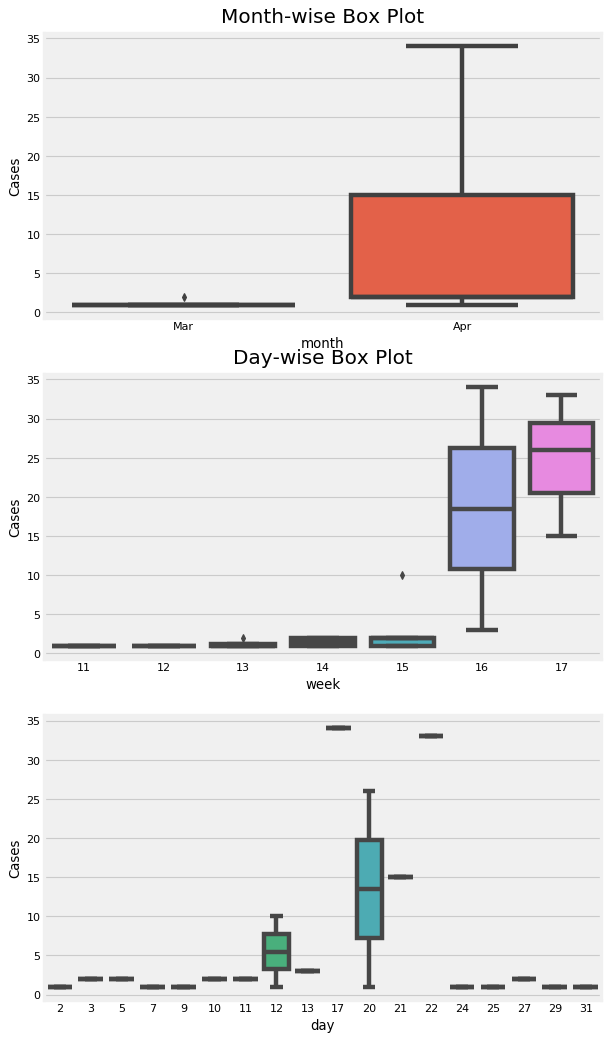

In [282]:
# Importing the data
df = pd.read_csv('../data/NumberConfirmedOfCases.csv', parse_dates=['Date'], index_col='Date')
df = df.groupby('Date')['Cases'].sum().reset_index() #group the data
df.reset_index(inplace=True)

# Prepare data
#df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
df['day']=df['Date'].dt.day
df['week']=df['Date'].dt.week
months = df['month'].unique()

# Plotting
fig, axes = plt.subplots(3,1, figsize=(8,16), dpi= 80)
sns.boxplot(x='month', y='Cases', data=df, ax=axes[0])
sns.boxplot(x='week', y='Cases', data=df,ax=axes[1])
sns.boxplot(x='day', y='Cases', data=df,ax=axes[2])
axes[0].set_title('Month-wise Box Plot', fontsize=18); 
axes[1].set_title('Week-wise Box Plot', fontsize=18)
axes[1].set_title('Day-wise Box Plot', fontsize=18)

plt.show()

## Autocorrelation and partial autocorrelation

Autocorrelation measures the relationship between a variable's current value and its past values.

Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

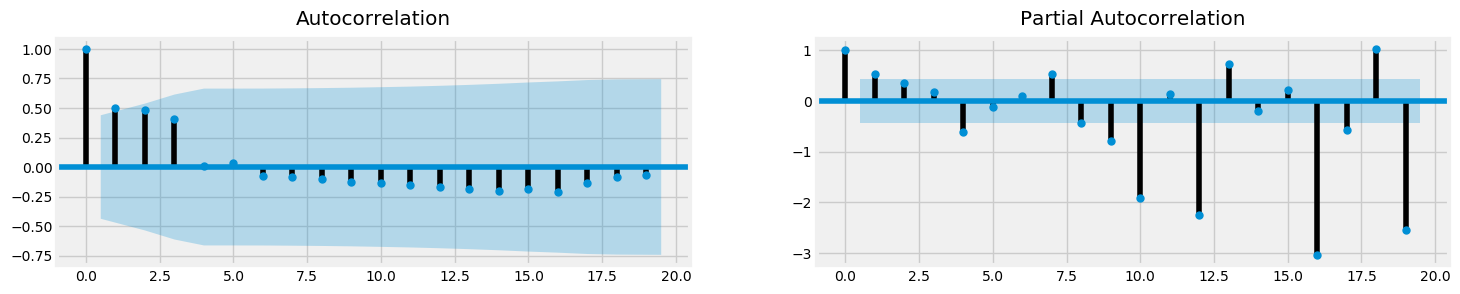

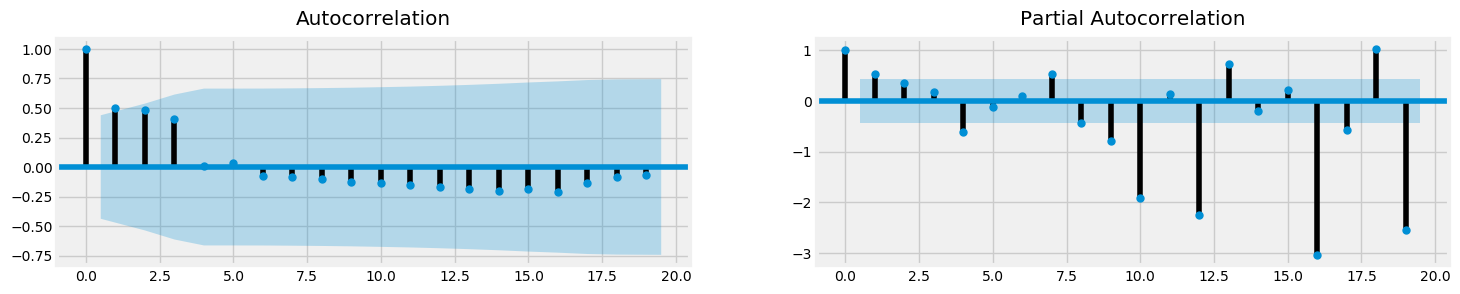

In [283]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('../data/NumberConfirmedOfCases.csv')
df = df.groupby('Date')['Cases'].sum().reset_index() #group the data


# Calculate ACF and PACF upto 1 lags
acf_1 = acf(df.Cases, nlags=len(df.Cases)-1)
pacf_1 = pacf(df.Cases, nlags=len(df.Cases)-1)

#Plotting
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.Cases.tolist(), lags=len(df.Cases)-1, ax=axes[0])
plot_pacf(df.Cases.tolist(), lags=len(df.Cases)-1, ax=axes[1])

## Lag Plots

A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series like the one you see below, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

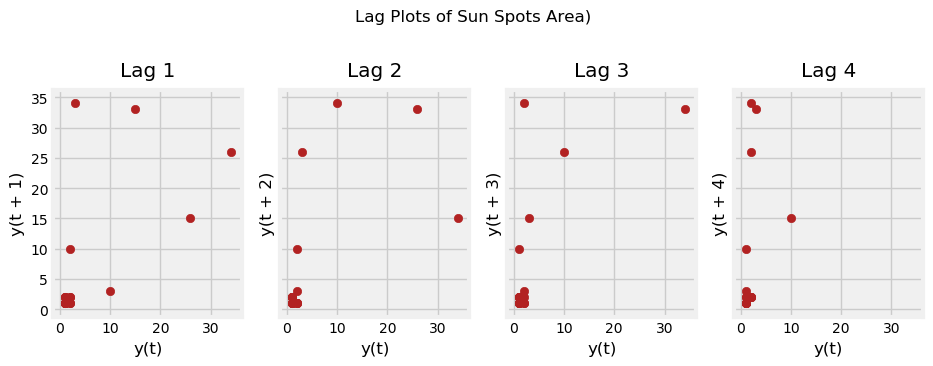

In [284]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Import
df = pd.read_csv('../data/NumberConfirmedOfCases.csv')
df = df.groupby('Date')['Cases'].sum().reset_index() #group the data

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df.Cases, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))
    fig.suptitle('Lag Plots of Sun Spots Area)', y=1.15)    



## Estimating the forecastability

The more regular and repeatable patterns a time series has, the easier it is to forecast. Since we have a small dataset, we apply a Sample Entropy to examine that. Put in mind that, The higher the approximate entropy, the more difficult it is to forecast it.





In [285]:
# https://en.wikipedia.org/wiki/Sample_entropy
df = pd.read_csv('../data/NumberConfirmedOfCases.csv')
df = df.groupby('Date')['Cases'].sum().reset_index() #group the data


def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

print(SampEn(df.Cases, m=2, r=0.2*np.std(df.Cases)))    

0.1670540846631662


In [286]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).std()
    rolstd = pd.Series(timeseries).rolling(window=12).mean()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

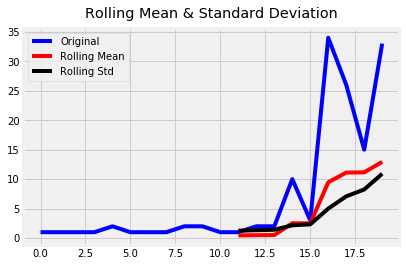

Results of Dickey-Fuller Test:
Test Statistic                  1.576277
p-value                         0.997785
#Lags Used                      8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


In [287]:
df = pd.read_csv('../data/NumberConfirmedOfCases.csv')
df = df.groupby('Date')['Cases'].sum().reset_index() #group the data

test_stationarity(df['Cases'])

The standard deviation and th mean are clearly increasing with time therefore, this is not a stationary series.

In [289]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df['Cases'], order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
#plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.